In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading

In [2]:
dis_des=pd.read_csv("Disease_Description.csv")
do_sp=pd.read_csv("Doctor_Specialist.csv")
do_dis=pd.read_csv("Doctor_Versus_Disease.csv", encoding='ISO-8859-1')

In [3]:
or_=pd.read_csv('Original_Dataset.csv')
sp=pd.read_excel('Specialist.xlsx')
sy_we=pd.read_csv('Symptom_Weights.csv')

In [4]:
print("Info About The Disease Describtion Table")
print(dis_des.info())
print(dis_des.describe())

Info About The Disease Describtion Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes
None
              Disease                                        Description
count              41                                                 41
unique             41                                                 41
top     Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
freq                1                                                  1


In [5]:
print("Info About The Doctor Specialist Table")
print(do_sp.info())
print(do_sp.describe())

Info About The Doctor Specialist Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Doctor Specialist  19 non-null     object
dtypes: object(1)
memory usage: 280.0+ bytes
None
       Doctor Specialist
count                 19
unique                19
top        Dermatologist
freq                   1


In [6]:
print("Info About The Doctor Versus Disease Table")
print(do_dis.info())
print(do_dis.describe())

Info About The Doctor Versus Disease Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Drug Reaction  40 non-null     object
 1   Allergist      40 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes
None
       Drug Reaction     Allergist
count             40            40
unique            40            18
top          Allergy  Hepatologist
freq               1             6


In [7]:
print("Info About The Original Dataset Table")
print(or_.info())
print(or_.describe())

Info About The Original Dataset Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB
None
       

In [8]:
print("Info About The Specialist Table")
print(sp.info())
print(sp.describe())

Info About The Specialist Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, Unnamed: 0 to Disease
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None
        Unnamed: 0      itching    skin_rash   nodal_skin_eruptions  \
count  4920.000000  4920.000000  4920.000000            4920.000000   
mean   2459.500000     0.137805     0.159756               0.021951   
std    1420.425992     0.344730     0.366417               0.146539   
min       0.000000     0.000000     0.000000               0.000000   
25%    1229.750000     0.000000     0.000000               0.000000   
50%    2459.500000     0.000000     0.000000               0.000000   
75%    3689.250000     0.000000     0.000000               0.000000   
max    4919.000000     1.000000     1.000000               1.000000   

        dischromic _patches   continuous_sneezing    shivering       chills  \
count           4920.000000           4920.000000  4920.000000  4920.00000

In [9]:
print("Info About The Symptom Weights Table")
print(sy_we.info())
print(sy_we.describe())

Info About The Symptom Weights Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   abdominal_pain  130 non-null    object
 1   1               130 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
                1
count  130.000000
mean    66.500000
std     37.671829
min      2.000000
25%     34.250000
50%     66.500000
75%     98.750000
max    131.000000


In [10]:
dis_des.head(4)

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."


In [11]:
do_sp.head(4)

,Doctor Specialist
0,Dermatologist
1,Allergist
2,Gastroenterologist
3,Hepatologist


In [12]:
do_dis.head(4)

,Drug Reaction,Allergist
0,Allergy,Allergist
1,Hypertension,Cardiologist
2,Heart attack,Cardiologist
3,Psoriasis,Dermatologist


In [13]:
or_.head(4)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
sp.head(20)

,Unnamed: 0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
2,2,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
3,3,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
5,5,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
6,6,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
7,7,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
8,8,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
9,9,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist


In [15]:
sy_we.head(20)

,abdominal_pain,1
0,abnormal_menstruation,2
1,acidity,3
2,acute_liver_failure,4
3,altered_sensorium,5
4,anxiety,6
5,back_pain,7
6,belly_pain,8
7,blackheads,9
8,bladder_discomfort,10
9,blister,11


# Data Preprocessing

In [16]:
# Creating the symptoms column
or_["symptoms"]= or_.iloc[:,1:].apply(lambda row: list(row.dropna()), axis=1)
or_.head(3)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, ..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ skin_rash, nodal_skin_eruptions, dischromi..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal_skin_eruptions, dischromic _..."


In [17]:
# Calculating the number of unique symptoms
symptoms= or_.iloc[:,1:-1].stack().dropna().unique().tolist()
print(len(symptoms))

131


In [18]:
df = pd.concat([or_.apply(lambda row: int(symptom in row['symptoms']), axis=1) for symptom in symptoms], axis=1)
df.columns = symptoms
df["disease"] = or_["Disease"]
df.head(2)

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,disease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Feature Engineering

In [19]:
# Merge df with doctor_disease_df on the "disease" column 

df = df.merge(do_dis[["Drug Reaction", "Allergist"]], left_on="disease", right_on="Drug Reaction", how='left')
df.head(10)

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,disease,Drug Reaction,Allergist
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist
5,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist
6,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist
7,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist
9,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,Fungal infection,Dermatologist


In [20]:
# Remove "Drug Reaction" and rename the Allergist column
df.drop("Drug Reaction", axis=1, inplace=True)
df.rename(columns={"Allergist": "Specialist"}, inplace=True)
df.head(10)

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,disease,Specialist
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist
5,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist
6,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist
7,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist
9,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Dermatologist


### Checking for Nan values

In [21]:
df.isna().sum()

itching                    0
 skin_rash                 0
 nodal_skin_eruptions      0
 dischromic _patches       0
 continuous_sneezing       0
                        ... 
 blister                   0
 red_sore_around_nose      0
 yellow_crust_ooze         0
disease                    0
Specialist               120
Length: 133, dtype: int64

In [22]:
# Remove the rows that have no Specialists values
df.dropna(subset=['Specialist'], inplace=True)
df.isna().sum()

itching                  0
 skin_rash               0
 nodal_skin_eruptions    0
 dischromic _patches     0
 continuous_sneezing     0
                        ..
 blister                 0
 red_sore_around_nose    0
 yellow_crust_ooze       0
disease                  0
Specialist               0
Length: 133, dtype: int64

## Splitting the Data

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score

# Splitting the data into features (X) and target variable (y)
X = df.drop(["disease", "Specialist"], axis=1)
y = df["Specialist"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training and predicting the data

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

## Evaluating the model

In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{confusion_mat}")

# Calculate precision, recall, and F1-score
classification_rep = classification_report(y_test, y_pred,output_dict=True)
print(f"Classification Report:\n{pd.DataFrame(classification_rep).T}")

Accuracy: 1.00
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Confusion Matrix:
[[ 35   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  58   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  95   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 105   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  27   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  24   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 143   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  44   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  20   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  52   0   0   0   0   0   0]
 [  0   0   0   0   0   0

## Save the trained model

In [26]:
import joblib

# Save the trained model
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

In [27]:
import json
d=(X.iloc[1,:])
d


itching                  0
 skin_rash               1
 nodal_skin_eruptions    1
 dischromic _patches     1
 continuous_sneezing     0
                        ..
 small_dents_in_nails    0
 inflammatory_nails      0
 blister                 0
 red_sore_around_nose    0
 yellow_crust_ooze       0
Name: 1, Length: 131, dtype: int64

In [28]:
print(X.columns)

Index(['itching', ' skin_rash', ' nodal_skin_eruptions',
       ' dischromic _patches', ' continuous_sneezing', ' shivering', ' chills',
       ' watering_from_eyes', ' stomach_pain', ' acidity',
       ...
       ' bladder_discomfort', ' foul_smell_of urine',
       ' continuous_feel_of_urine', ' skin_peeling', ' silver_like_dusting',
       ' small_dents_in_nails', ' inflammatory_nails', ' blister',
       ' red_sore_around_nose', ' yellow_crust_ooze'],
      dtype='object', length=131)


## Visualisation

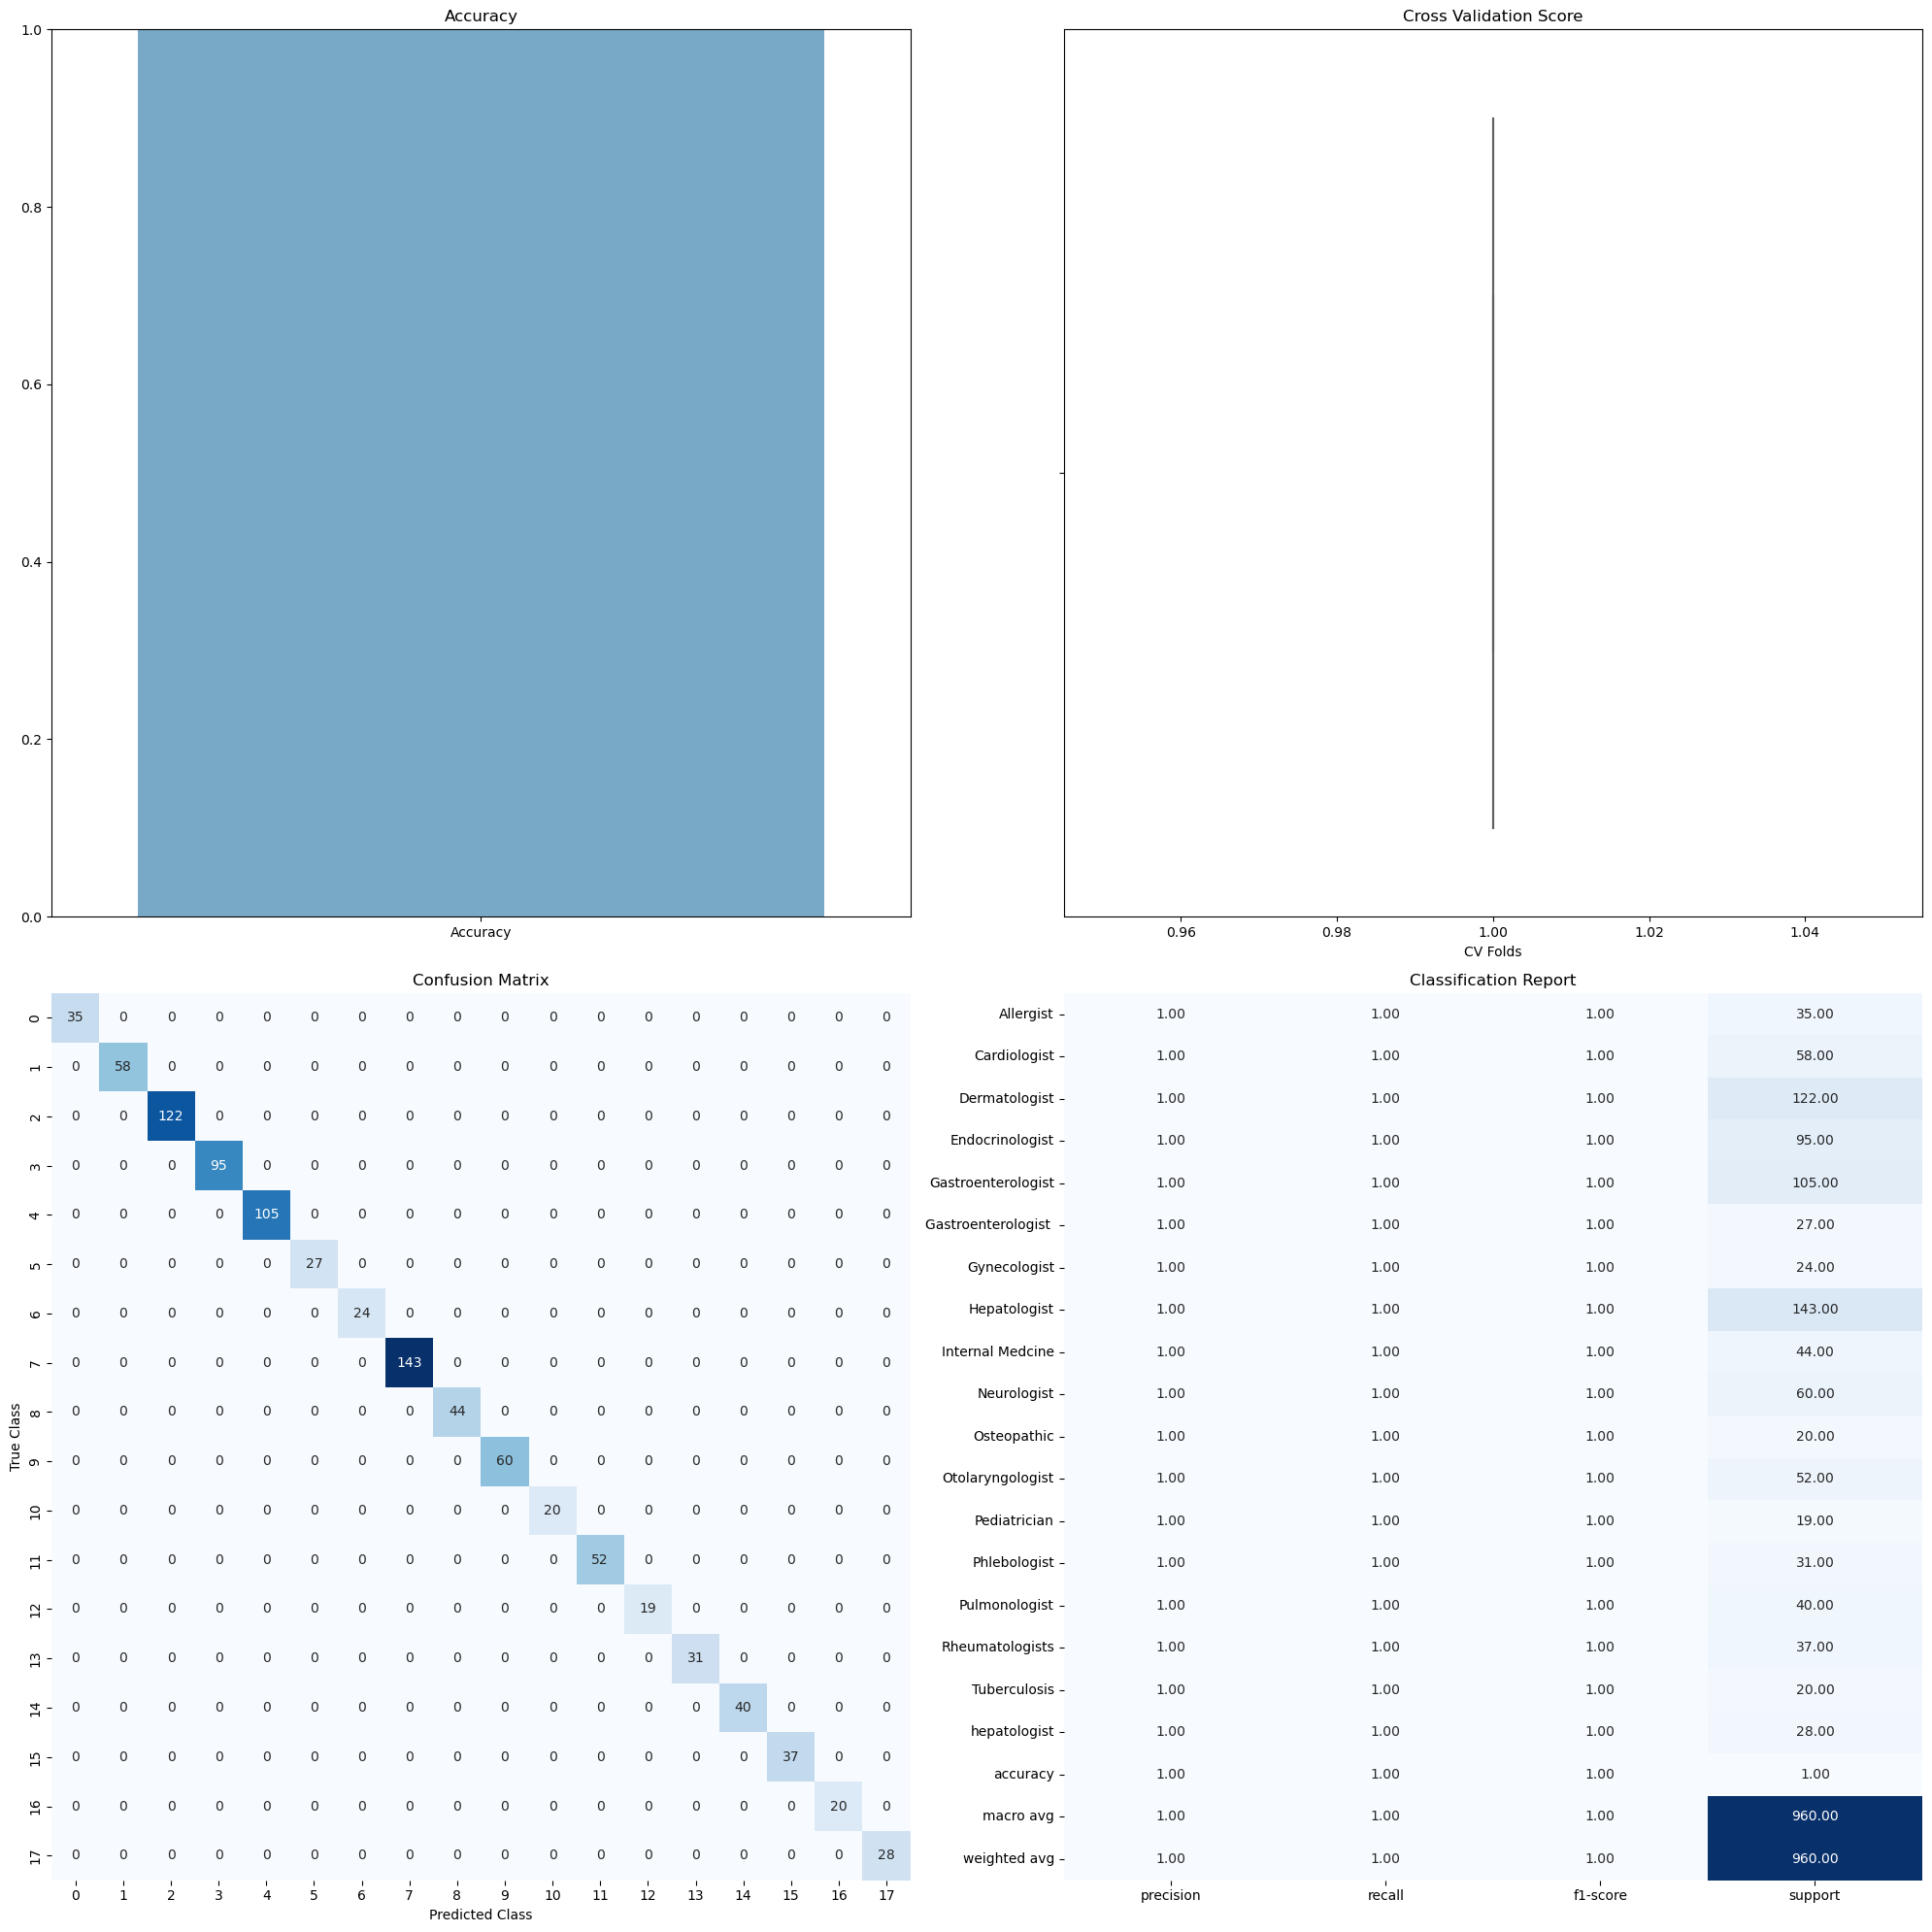

In [38]:
# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))

# Accuracy
plt.subplot(2,2,1)
sns.barplot(x=["Accuracy"],y=[accuracy],palette="Blues")
plt.title("Accuracy")
plt.ylim([0,1])

# Cross Validation Score
plt.subplot(2,2,2)
sns.boxplot(x=cv_scores,palette="Blues")
plt.xlabel("CV Folds")
plt.title("Cross Validation Score")

# Confusion Matrix
plt.subplot(2,2,3)
sns.heatmap(confusion_mat,annot=True, cmap="Blues", fmt=".0f", cbar=False )
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Classification Report
plt.subplot(2,2,4)
sns.heatmap(pd.DataFrame(classification_rep).T,annot=True, cmap="Blues", fmt=".2f", cbar=False )
plt.title("Classification Report")

plt.tight_layout()
plt.show()






